<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 1. Neuronas artificiales (Diplomado en inteligencia artificial)

El objetivo de esta libreta es programar un perceptrón el cual es la unidad fundamental de una red neuronal.

In [1]:
#Carga de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
np.random.seed(3)

### Paso 1: generar datos sintéticos

Para la generación de datos se usará la función de [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de la biblioteca de scikit - learn.

In [2]:
#número de clases que deseamos generar
n_classes = 2

#Generación de datos
data, label = make_classification(n_samples = 100,
                                  n_features=2,
                                  n_redundant=0,
                                  n_informative=2,
                                  n_clusters_per_class=1,
                                  class_sep=5)

#Asignación de los datos
classes = [data[label==i] for i in range(n_classes)]

In [3]:
print("Tamaño de los datos: ", data.shape)
print("Tamaño de las etiquetas: ", label.shape)
print("Clases: ", len(classes))

Tamaño de los datos:  (100, 2)
Tamaño de las etiquetas:  (100,)
Clases:  2


In [4]:
#Visualizando los datos
label

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [5]:
def plot_classes(classes):
    """
    Visualizar los datos sintéticos generados
    Args:
    classes: int (indica el número de clases presentes en los datos)
    """
    _,axis = plt.subplots(figsize=(5,5))
    for i, clase in enumerate(classes):
        axis.plot(clase[:, 0], clase[:, 1], '.', label=f'Clase {i}')
    plt.legend()
    plt.show()

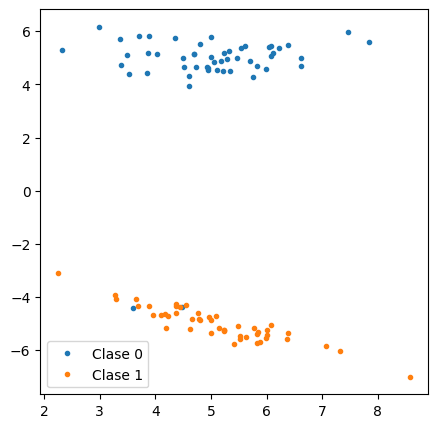

In [6]:
plot_classes(classes)

Paso 2: trazaremos una línea de separación entre los datos

In [7]:
def separar_datos(a, b, inter=(np.min(data[:, 0]),np.max(data[:, 0]))):
    x = np.linspace(*inter)
    y = a*x + b # Forma ordenada-pendiente
    return x, y

In [8]:
#Visualizar los datos sintéticos generados
def plot_data_pendiente(classes, a, b):
    _,axis = plt.subplots(figsize=(5,5))
    for i, clase in enumerate(classes):
        axis.plot(clase[:, 0], clase[:, 1], '.', label=f'Clase {i}')
    plt.legend()
    x, y = separar_datos(a,b)
    axis.plot(x,y)

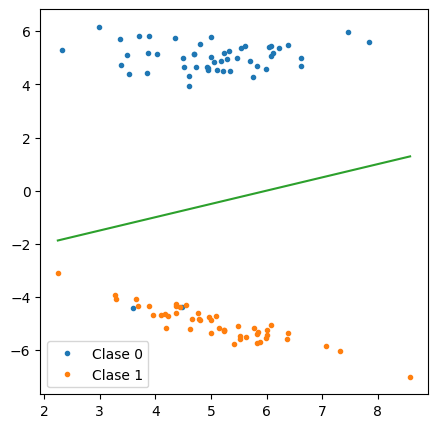

In [9]:
a = 0.5
b = -3
plot_data_pendiente(classes, a, b)

In [10]:
def plot_new_point(classes, a, b, cx, cy):
    _,axis = plt.subplots(figsize=(5,5))
    for i, clase in enumerate(classes):
        axis.plot(clase[:, 0], clase[:, 1], '.', label=f'Clase {i}')
    plt.legend()
    x, y = separar_datos(a,b)
    axis.plot(x,y)
    axis.plot(cx,cy, 'r*')

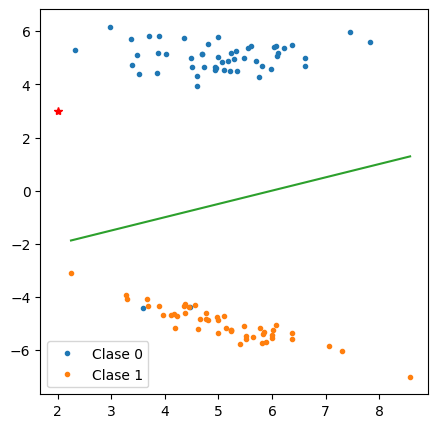

In [11]:
cx = 2
cy = 3
plot_new_point(classes, a, b, cx, cy)

Paso 3: clasificar

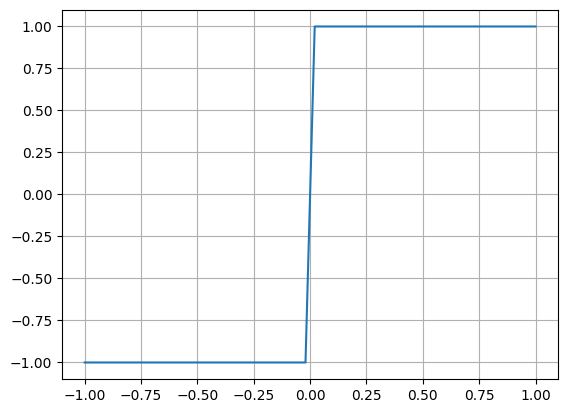

In [12]:
def func_escalon(y):
  """
  Función de activación
  """
  return y / np.abs(y)

f = np.linspace(-1,1)
plt.plot(f, func_escalon(f))
plt.grid()

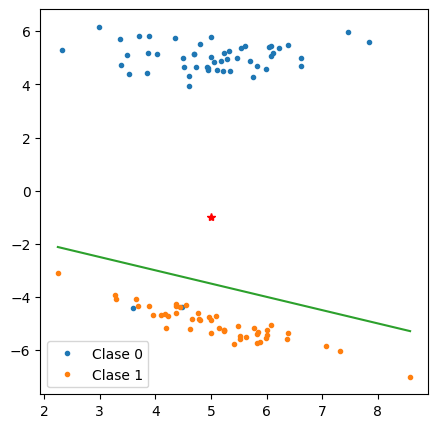

In [13]:
a = -0.5
b = -1
cx= 5
cy=-1
plot_new_point(classes, a, b, cx, cy)

In [14]:
def clasificar(a,b, x, y):
    return func_escalon(y - (a*x + b))

clase = clasificar(a,b, cx, cy)
print(f'El punto {cx,cy} pertenece a la clase {clase}')

El punto (5, -1) pertenece a la clase 1.0


#Funciones de activación

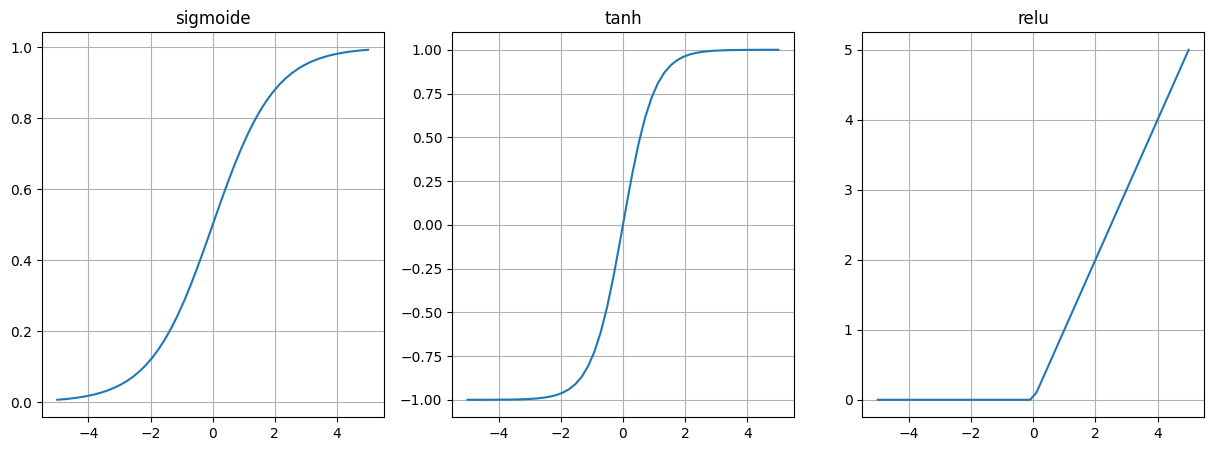

In [15]:
def sigmoide(z):
    return 1 / ( 1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-5,5)
_, axs = plt.subplots(1,3, figsize=(15,5))

for f, title, ax in zip([ sigmoide,   tanh,   relu],
                        ['sigmoide', 'tanh', 'relu'],
                        axs):
    ax.plot(z, f(z))
    ax.grid()
    ax.set_title(title)
plt.show()

In [16]:
def clasificar_vec(X, W, activacion=sigmoide):
    return activacion(np.dot(W.T, X))

a = -0.5
b = 1
cx = 5
cy= 1

W = np.array([[a], #w0
              [b], #w1
              [1]])#w2
X = np.array([[1], #x0
              [cx], #x1 - x
              [cy]])#x2 - y

print(f'El punto {cx,cy} percenece a la clase {clasificar_vec(X,W, sigmoide)}')

El punto (5, 1) percenece a la clase [[0.99592986]]


## Visualización interactiva

Tensorflow ofrece una herramienta interactiva para estudiar las redes neuronales, pero en particular, nos permite interactuar con diferentes parámetros de la red.

Herramienta: [playground.tensorflow](https://playground.tensorflow.org)